<hr style="margin-bottom: 40px;">

### Table of Contents

1. [Introduction](#introduction)
2. [Exploratory Data Analysis (EDA)](#eda)
3. [Preprocessing](#preprocessing)
4. [Modelling](#modelling)
    - [Logistic Regression](#logistic-regression)
5. [Model Evaluation](#model-evaluation)
6. [Discussion of Results](#discussion-of-results)

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)


## Introduction
This project focuses on predicting the success of startups in securing funding. By analyzing various datasets related to office structures, individuals, relationships, degrees, and investment rounds, we aim to identify key factors that influence funding outcomes.

### __Exploratory Data Analysis (EDA)__



<hr style="margin-bottom: 40px;">

#### EDA Outline
<!-- 
- Data Loading and Overview
- Summary Statistics and Missing Values
- Correlation Analysis
- Distribution Analysis
- Distribution of Reviews by Nationality and Hotel Location
- Word Clouds for Positive and Negative Reviews -->

### Data Loading and Overview

First, let's load the data and understand what we are working with.

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Load all data sets
funding_rounds = pd.read_csv('Data/funding_rounds.csv')
relationships = pd.read_csv('Data/relationships.csv')
degrees = pd.read_csv('Data/degrees.csv')
offices = pd.read_csv('Data/offices.csv')
investments = pd.read_csv('Data/investments.csv')
people = pd.read_csv('Data/people.csv')
objects = pd.read_csv('data/objects.csv')

/var/folders/3j/vpqx3sps0qz3c7594b50yyqc0000gn/T/ipykernel_6169/1518837049.py:8: DtypeWarning: Columns (3,7,9,10,17,18,21,22,23,25,26,29,30,37) have mixed types. Specify dtype option on import or set low_memory=False.
  objects = pd.read_csv('data/objects.csv')


In [6]:

# Specify data types to avoid mixed type warnings
dtype_spec = {
    'id': str,
    'entity_id': str,
    'parent_id': str,
    'name': str,
    'normalized_name': str,
    'permalink': str,
    'category_code': str,
    'status': str,
    'founded_at': str,  # Dates will be converted later
    'closed_at': str,   # Dates will be converted later
    'domain': str,
    'homepage_url': str,
    'twitter_username': str,
    'logo_url': str,
    'logo_width': float,
    'logo_height': float,
    'short_description': str,
    'description': str,
    'overview': str,
    'tag_list': str,
    'country_code': str,
    'state_code': str,
    'city': str,
    'region': str,
    'first_investment_at': str,  # Dates will be converted later
    'last_investment_at': str,   # Dates will be converted later
    'investment_rounds': float,
    'invested_companies': float,
    'first_funding_at': str,     # Dates will be converted later
    'last_funding_at': str,      # Dates will be converted later
    'funding_rounds': float,
    'funding_total_usd': float,
    'first_milestone_at': str,   # Dates will be converted later
    'last_milestone_at': str,    # Dates will be converted later
    'milestones': float,
    'relationships': float,
    'created_by': str,
    'created_at': str,           # Dates will be converted later
    'updated_at': str            # Dates will be converted later
}


# Load datasets with dtype specification

funding_rounds = pd.read_csv('Data/funding_rounds.csv')
relationships = pd.read_csv('Data/relationships.csv')
degrees = pd.read_csv('Data/degrees.csv')
offices = pd.read_csv('Data/offices.csv')
investments = pd.read_csv('Data/investments.csv')
people = pd.read_csv('Data/people.csv')
objects = pd.read_csv('data/objects.csv',  dtype=dtype_spec, low_memory=False)


# Convert date columns to datetime
date_columns = ['founded_at', 'closed_at', 'first_investment_at', 'last_investment_at',
                'first_funding_at', 'last_funding_at', 'first_milestone_at', 'last_milestone_at',
                'created_at', 'updated_at']
for col in date_columns:
    objects[col] = pd.to_datetime(objects[col], errors='coerce')


### Summary, Statistics and Missing Values

We will perform basic statistical analysis and check for missing values.

Specify data types to avoid mixed type warnings

In [7]:
#View shape of all data
print('degrees',degrees.shape)
print('investments',investments.shape)
print('offices',offices.shape)
print('people',people.shape)
print('relationships',relationships.shape)
print('funding_rounds', funding_rounds.shape)
print('objects',objects.shape)

degrees (109610, 8)
investments (80902, 6)
offices (112718, 15)
people (226709, 6)
relationships (402878, 11)
funding_rounds (52928, 23)
objects (462651, 40)


__Shapes of all data Sets:__

| Data           | Shape       |
|----------------|-------------|
| degrees        | (109610,8)  |
| investments    | (80902,6)   |
| offices        | (112718,15) |
| people         | (226709,6)  |
| relationships  | (402878,11) |
| funding_rounds | (52928,23)  |
| objects        | (462651,40) |

__`Investments Dataset Summary:__

This dataset provides information about investments made by investors in various funding rounds. Key columns include `investor_id`, `company_id`, and `investment_amount`. This data can help analyze the investor network and the investment patterns in different startups.

In [8]:
#Overview of data set "objects" info
investments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80902 entries, 0 to 80901
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   id                  80902 non-null  int64 
 1   funding_round_id    80902 non-null  int64 
 2   funded_object_id    80902 non-null  object
 3   investor_object_id  80902 non-null  object
 4   created_at          80902 non-null  object
 5   updated_at          80902 non-null  object
dtypes: int64(2), object(4)
memory usage: 3.7+ MB


In [9]:
# Summary Statistics 
investments.describe()

,id,funding_round_id
count,80902.000000,80902.000000
mean,40451.500000,24020.171257
std,23354.540076,15163.034069
min,1.000000,1.000000
25%,20226.250000,11747.250000
50%,40451.500000,22594.500000
75%,60676.750000,34794.000000
max,80902.000000,57948.000000


In [10]:
#Overview of first few rows data set "Objects"
investments.head()

,id,funding_round_id,funded_object_id,investor_object_id,created_at,updated_at
0,1,1,c:4,f:1,2007-07-04 04:52:57,2008-02-27 23:14:29
1,2,1,c:4,f:2,2007-07-04 04:52:57,2008-02-27 23:14:29
2,3,3,c:5,f:4,2007-05-27 06:09:10,2013-06-28 20:07:23
3,4,4,c:5,f:1,2007-05-27 06:09:36,2013-06-28 20:07:24
4,5,4,c:5,f:5,2007-05-27 06:09:36,2013-06-28 20:07:24


__Objects Data set:__

This dataset provides general information about the startups. Key columns include:
- `company_name`, `company_status`, `company_founded_at`, `company_category_code`, `company_city`, `company_state`, `company_country`, `company_region`, `company_total_funding_usd`, `company_funding_rounds`, and `company_number_of_employees`. 

This dataset is essential for deriving features like the age of the company, industry sector, geographic location, total funding, and employee count.

In [11]:
#Overview of first few rows data set "Objects"
objects.head().T

,0,1,2,3,4
id,c:1,c:10,c:100,c:10000,c:10001
entity_type,Company,Company,Company,Company,Company
entity_id,1,10,100,10000,10001
parent_id,NaN,NaN,NaN,NaN,NaN
name,Wetpaint,Flektor,There,MYWEBBO,THE Movie Streamer
normalized_name,wetpaint,flektor,there,mywebbo,the movie streamer
permalink,/company/wetpaint,/company/flektor,/company/there,/company/mywebbo,/company/the-movie-streamer
category_code,web,games_video,games_video,network_hosting,games_video
status,operating,acquired,acquired,operating,operating
founded_at,2005-10-17 00:00:00,NaT,NaT,2008-07-26 00:00:00,2008-07-26 00:00:00


In [12]:
#Overview of data set "objects" info
objects.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 462651 entries, 0 to 462650
Data columns (total 40 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   id                   462651 non-null  object        
 1   entity_type          462651 non-null  object        
 2   entity_id            462651 non-null  object        
 3   parent_id            27715 non-null   object        
 4   name                 462647 non-null  object        
 5   normalized_name      462620 non-null  object        
 6   permalink            462651 non-null  object        
 7   category_code        123186 non-null  object        
 8   status               462651 non-null  object        
 9   founded_at           100441 non-null  datetime64[ns]
 10  closed_at            2809 non-null    datetime64[ns]
 11  domain               174942 non-null  object        
 12  homepage_url         174942 non-null  object        
 13  twitter_userna

In [13]:
# Summary Statistics 
objects.describe()

,founded_at,closed_at,logo_width,logo_height,first_investment_at,last_investment_at,investment_rounds,invested_companies,first_funding_at,last_funding_at,funding_rounds,funding_total_usd,first_milestone_at,last_milestone_at,milestones,relationships,created_at,updated_at
count,100441,2809,462651.000000,462651.000000,16956,16956,462651.000000,462651.000000,31507,31507,462651.000000,4.626510e+05,100358,100358,462651.000000,462651.000000,462591,462651
mean,2005-09-18 13:45:03.163050880,2011-05-14 00:56:54.168743424,189.159799,130.488664,2010-01-15 04:55:37.579618048,2011-06-09 16:56:43.821655808,0.173939,0.138132,2010-06-11 11:43:03.997206784,2011-04-12 14:50:51.893229824,0.113749,8.926722e+05,2007-07-28 18:51:15.629247232,2008-01-16 12:36:44.810777600,0.265196,1.794305,2011-11-27 03:30:26.466390016,2012-05-01 06:12:33.123642112
min,1901-01-01 00:00:00,1960-07-22 00:00:00,0.000000,0.000000,1974-01-01 00:00:00,1974-01-01 00:00:00,0.000000,0.000000,1960-01-01 00:00:00,1960-01-01 00:00:00,0.000000,0.000000e+00,1960-01-01 00:00:00,1960-01-01 00:00:00,0.000000,0.000000,2007-05-25 06:51:27,2008-02-05 22:32:55
25%,2004-01-01 00:00:00,2010-06-10 00:00:00,0.000000,0.000000,2007-11-01 00:00:00,2010-02-01 00:00:00,0.000000,0.000000,2008-09-01 00:00:00,2010-01-10 00:00:00,0.000000,0.000000e+00,2005-01-15 00:00:00,2006-01-01 00:00:00,0.000000,0.000000,2010-07-19 08:52:31,2011-03-31 02:04:33.500000
50%,2008-12-01 00:00:00,2012-01-01 00:00:00,0.000000,0.000000,2010-11-24 12:00:00,2012-04-04 00:00:00,0.000000,0.000000,2011-02-22 00:00:00,2012-01-01 00:00:00,0.000000,0.000000e+00,2010-01-01 00:00:00,2010-06-03 00:00:00,0.000000,1.000000,2012-06-15 18:36:06,2013-02-05 20:47:02
75%,2011-01-14 00:00:00,2012-12-01 00:00:00,216.000000,139.000000,2012-09-01 00:00:00,2013-06-11 00:00:00,0.000000,0.000000,2012-08-01 00:00:00,2013-03-20 00:00:00,0.000000,0.000000e+00,2011-12-01 00:00:00,2012-04-21 00:00:00,0.000000,2.000000,2013-06-26 12:24:39,2013-08-09 12:08:51.500000
max,2014-10-01 00:00:00,2014-12-31 00:00:00,18200.000000,9600.000000,2013-12-12 00:00:00,2013-12-12 00:00:00,529.000000,459.000000,2013-12-12 00:00:00,2013-12-12 00:00:00,15.000000,5.700000e+09,2014-12-31 00:00:00,2014-12-31 00:00:00,9.000000,1189.000000,2013-12-12 14:29:16,2013-12-12 14:29:40
std,NaN,NaN,432.403482,337.191612,NaN,NaN,3.637983,2.549245,NaN,NaN,0.524229,1.700120e+07,NaN,NaN,0.568577,5.456711,NaN,NaN


__Degrees Dataset:__

This dataset provides information about the educational background of individuals. Key columns include `degree_type`, `degree_subject`, `degree_institution`, and `person_id`, which can be linked to the __people dataset__ to get a comprehensive view of the founders' and key team members' educational backgrounds.

In [14]:
#Overview of data "degrees"
degrees.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109610 entries, 0 to 109609
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            109610 non-null  int64 
 1   object_id     109610 non-null  object
 2   degree_type   98389 non-null   object
 3   subject       81298 non-null   object
 4   institution   109555 non-null  object
 5   graduated_at  58054 non-null   object
 6   created_at    109610 non-null  object
 7   updated_at    109610 non-null  object
dtypes: int64(1), object(7)
memory usage: 6.7+ MB


In [15]:
# Summary Statistics 
degrees.describe()

,id
count,109610.00000
mean,54805.50000
std,31641.82584
min,1.00000
25%,27403.25000
50%,54805.50000
75%,82207.75000
max,109610.00000


In [16]:
#View first few rows summary
degrees.head()

,id,object_id,degree_type,subject,institution,graduated_at,created_at,updated_at
0,1,p:6117,MBA,NaN,NaN,NaN,2008-02-19 03:17:36,2008-02-19 03:17:36
1,2,p:6136,BA,"English, French","Washington University, St. Louis",1990-01-01,2008-02-19 17:58:31,2008-02-25 00:23:55
2,3,p:6136,MS,Mass Communication,Boston University,1992-01-01,2008-02-19 17:58:31,2008-02-25 00:23:55
3,4,p:6005,MS,Internet Technology,University of Greenwich,2006-01-01,2008-02-19 23:40:40,2008-02-25 00:23:55
4,5,p:5832,BCS,"Computer Science, Psychology",Rice University,NaN,2008-02-20 05:28:09,2008-02-20 05:28:09


__Offices Dataset:__

This dataset contains information about the offices of the startups. Key columns include `company_id`, `office_city`, `office_state`, `office_country`, and `office_region`. This dataset is useful for understanding the geographical footprint of the startups.



In [17]:
#Overview of data
offices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112718 entries, 0 to 112717
Data columns (total 15 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            112718 non-null  int64  
 1   object_id     112718 non-null  object 
 2   office_id     112718 non-null  int64  
 3   description   68530 non-null   object 
 4   region        112718 non-null  object 
 5   address1      94430 non-null   object 
 6   address2      44520 non-null   object 
 7   city          107550 non-null  object 
 8   zip_code      93230 non-null   object 
 9   state_code    62017 non-null   object 
 10  country_code  112718 non-null  object 
 11  latitude      112718 non-null  float64
 12  longitude     112718 non-null  float64
 13  created_at    0 non-null       float64
 14  updated_at    0 non-null       float64
dtypes: float64(4), int64(2), object(9)
memory usage: 12.9+ MB


In [18]:
#Summary Statistics 
offices.describe()

,id,office_id,latitude,longitude,created_at,updated_at
count,112718.000000,112718.000000,112718.000000,112718.000000,0.0,0.0
mean,56359.500000,64892.879859,10.901433,-16.329223,NaN,NaN
std,32539.028159,37224.327217,18.977868,43.979205,NaN,NaN
min,1.000000,1.000000,-43.767554,-159.480262,NaN,NaN
25%,28180.250000,32510.250000,0.000000,0.000000,NaN,NaN
50%,56359.500000,64901.500000,0.000000,0.000000,NaN,NaN
75%,84538.750000,97847.750000,30.837705,0.000000,NaN,NaN
max,112718.000000,127850.000000,69.650235,176.916281,NaN,NaN


In [19]:
# View first few rows summary
offices.head()

,id,object_id,office_id,description,region,address1,address2,city,zip_code,state_code,country_code,latitude,longitude,created_at,updated_at
0,1,c:1,1,NaN,Seattle,710 - 2nd Avenue,Suite 1100,Seattle,98104,WA,USA,47.603122,-122.333253,NaN,NaN
1,2,c:3,3,Headquarters,SF Bay,4900 Hopyard Rd,Suite 310,Pleasanton,94588,CA,USA,37.692934,-121.904945,NaN,NaN
2,3,c:4,4,NaN,SF Bay,135 Mississippi St,NaN,San Francisco,94107,CA,USA,37.764726,-122.394523,NaN,NaN
3,4,c:5,5,Headquarters,SF Bay,1601 Willow Road,NaN,Menlo Park,94025,CA,USA,37.416050,-122.151801,NaN,NaN
4,5,c:7,7,NaN,SF Bay,Suite 200,654 High Street,Palo Alto,94301,CA,ISR,0.000000,0.000000,NaN,NaN


__People Datset Summary:__

This dataset provides details about the individuals associated with the startups. Key columns include `person_name`, `person_position`, and `person_company_id`.

This dataset helps analyze the team structure and leadership of the startups.

In [20]:
#Overview of data
people.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226709 entries, 0 to 226708
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   id                226709 non-null  int64 
 1   object_id         226709 non-null  object
 2   first_name        226700 non-null  object
 3   last_name         226705 non-null  object
 4   birthplace        28084 non-null   object
 5   affiliation_name  226684 non-null  object
dtypes: int64(1), object(5)
memory usage: 10.4+ MB


In [21]:
#Summary Statistics 
people.describe()

,id
count,226709.000000
mean,113355.000000
std,65445.395426
min,1.000000
25%,56678.000000
50%,113355.000000
75%,170032.000000
max,226709.000000


In [22]:
#View first few rows summary
people.head()

,id,object_id,first_name,last_name,birthplace,affiliation_name
0,1,p:2,Ben,Elowitz,NaN,Blue Nile
1,2,p:3,Kevin,Flaherty,NaN,Wetpaint
2,3,p:4,Raju,Vegesna,NaN,Zoho
3,4,p:5,Ian,Wenig,NaN,Zoho
4,5,p:6,Kevin,Rose,"Redding, CA",i/o Ventures


__Relationship Dataset__

This dataset captures the relationships between different entities (e.g., companies, investors). Key columns include `entity1_id`, `entity2_id`, and `relationship_type`. 

This dataset is critical for analyzing the collaborative networks and the strength of the investor network.

In [23]:
#Overview of data
relationships.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 402878 entries, 0 to 402877
Data columns (total 11 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   id                      402878 non-null  int64 
 1   relationship_id         402878 non-null  int64 
 2   person_object_id        402878 non-null  object
 3   relationship_object_id  402878 non-null  object
 4   start_at                206995 non-null  object
 5   end_at                  101046 non-null  object
 6   is_past                 402878 non-null  int64 
 7   sequence                402878 non-null  int64 
 8   title                   389526 non-null  object
 9   created_at              402878 non-null  object
 10  updated_at              402878 non-null  object
dtypes: int64(4), object(7)
memory usage: 33.8+ MB


In [24]:
#Summary Statistics 
relationships.describe()

,id,relationship_id,is_past,sequence
count,402878.000000,402878.000000,402878.000000,402878.000000
mean,241836.986184,241836.986184,0.399285,3020.999049
std,139486.004688,139486.004688,0.489752,28343.055651
min,1.000000,1.000000,0.000000,1.000000
25%,120457.250000,120457.250000,0.000000,1.000000
50%,239798.500000,239798.500000,0.000000,1.000000
75%,364355.750000,364355.750000,1.000000,3.000000
max,480909.000000,480909.000000,1.000000,399946.000000


In [25]:
#View first few rows summary
relationships.head()

,id,relationship_id,person_object_id,relationship_object_id,start_at,end_at,is_past,sequence,title,created_at,updated_at
0,1,1,p:2,c:1,NaN,NaN,0,8,Co-Founder/CEO/Board of Directors,2007-05-25 07:03:54,2013-06-03 09:58:46
1,2,2,p:3,c:1,NaN,NaN,1,279242,VP Marketing,2007-05-25 07:04:16,2010-05-21 16:31:34
2,3,3,p:4,c:3,NaN,NaN,0,4,Evangelist,2007-05-25 19:33:03,2013-06-29 13:36:58
3,4,4,p:5,c:3,2006-03-01,2009-12-01,1,4,Senior Director Strategic Alliances,2007-05-25 19:34:53,2013-06-29 10:25:34
4,6,6,p:7,c:4,2005-07-01,2010-04-05,1,1,Chief Executive Officer,2007-05-25 20:05:33,2010-04-05 18:41:41


__Funding Rounds Summary:__

This dataset contains details about different funding rounds for startups. Key columns include `funding_round_type`, `raised_amount_usd`, and `funding_round_date`. 

This dataset is crucial for understanding the financial history of startups, including the amount of funding raised and the types of funding rounds.

In [26]:
funding_rounds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52928 entries, 0 to 52927
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        52928 non-null  int64  
 1   funding_round_id          52928 non-null  int64  
 2   object_id                 52928 non-null  object 
 3   funded_at                 52680 non-null  object 
 4   funding_round_type        52928 non-null  object 
 5   funding_round_code        52928 non-null  object 
 6   raised_amount_usd         52928 non-null  float64
 7   raised_amount             52928 non-null  float64
 8   raised_currency_code      49862 non-null  object 
 9   pre_money_valuation_usd   52928 non-null  float64
 10  pre_money_valuation       52928 non-null  float64
 11  pre_money_currency_code   26883 non-null  object 
 12  post_money_valuation_usd  52928 non-null  float64
 13  post_money_valuation      52928 non-null  float64
 14  post_m

In [27]:
funding_rounds.describe()

,id,funding_round_id,raised_amount_usd,raised_amount,pre_money_valuation_usd,pre_money_valuation,post_money_valuation_usd,post_money_valuation,participants,is_first_round,is_last_round
count,52928.000000,52928.000000,5.292800e+04,5.292800e+04,5.292800e+04,5.292800e+04,5.292800e+04,5.292800e+04,52928.000000,52928.000000,52928.000000
mean,28962.894536,28962.894536,7.946092e+06,8.056120e+06,3.294525e+05,3.294525e+05,1.824359e+06,1.862279e+06,1.528567,0.604576,0.604538
std,16821.871803,16821.871803,4.216820e+07,4.479914e+07,6.531803e+07,6.531803e+07,1.287065e+08,1.287686e+08,2.060192,0.488946,0.488954
min,1.000000,1.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000
25%,14343.750000,14343.750000,2.463300e+05,2.500000e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000
50%,28885.500000,28885.500000,1.600000e+06,1.565056e+06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000,1.000000,1.000000
75%,43561.250000,43561.250000,6.700000e+06,6.600000e+06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000,1.000000,1.000000
max,57952.000000,57952.000000,3.835050e+09,3.835050e+09,1.500000e+10,1.500000e+10,2.432423e+10,2.432423e+10,36.000000,1.000000,1.000000


In [28]:
funding_rounds.head()

,id,funding_round_id,object_id,funded_at,funding_round_type,funding_round_code,raised_amount_usd,raised_amount,raised_currency_code,pre_money_valuation_usd,...,post_money_valuation,post_money_currency_code,participants,is_first_round,is_last_round,source_url,source_description,created_by,created_at,updated_at
0,1,1,c:4,2006-12-01,series-b,b,8500000.0,8500000.0,USD,0.0,...,0.0,NaN,2,0,0,http://www.marketingvox.com/archives/2006/12/2...,NaN,initial-importer,2007-07-04 04:52:57,2008-02-27 23:14:29
1,2,2,c:5,2004-09-01,angel,angel,500000.0,500000.0,USD,0.0,...,0.0,USD,2,0,1,NaN,NaN,initial-importer,2007-05-27 06:08:18,2013-06-28 20:07:23
2,3,3,c:5,2005-05-01,series-a,a,12700000.0,12700000.0,USD,115000000.0,...,0.0,USD,3,0,0,http://www.techcrunch.com/2007/11/02/jim-breye...,Jim Breyer: Extra $500 Million Round For Faceb...,initial-importer,2007-05-27 06:09:10,2013-06-28 20:07:23
3,4,4,c:5,2006-04-01,series-b,b,27500000.0,27500000.0,USD,525000000.0,...,0.0,USD,4,0,0,http://www.facebook.com/press/info.php?factsheet,Facebook Funding,initial-importer,2007-05-27 06:09:36,2013-06-28 20:07:24
4,5,5,c:7299,2006-05-01,series-b,b,10500000.0,10500000.0,USD,0.0,...,0.0,NaN,2,0,0,http://www.techcrunch.com/2006/05/14/photobuck...,PhotoBucket Closes $10.5M From Trinity Ventures,initial-importer,2007-05-29 11:05:59,2008-04-16 17:09:12


# __Missing Values__

# __Funding Rounds__

In [29]:
# Check for missing values
display(funding_rounds.isna().sum())


id                              0
funding_round_id                0
object_id                       0
funded_at                     248
funding_round_type              0
funding_round_code              0
raised_amount_usd               0
raised_amount                   0
raised_currency_code         3066
pre_money_valuation_usd         0
pre_money_valuation             0
pre_money_currency_code     26045
post_money_valuation_usd        0
post_money_valuation            0
post_money_currency_code    22480
participants                    0
is_first_round                  0
is_last_round                   0
source_url                  12546
source_description           9489
created_by                   4637
created_at                      0
updated_at                      0
dtype: int64

In [30]:
funding_rounds.drop(['id','funding_round_id', 'funding_round_code', 'raised_amount', 'raised_currency_code',
    'pre_money_valuation_usd', 'pre_money_valuation', 'pre_money_currency_code',
    'post_money_valuation_usd', 'post_money_valuation', 'post_money_currency_code',
    'participants', 'is_first_round', 'is_last_round', 'source_url', 'source_description',
    'created_by', 'updated_at', 'created_at'], axis='columns', inplace=True)

Review dropping `participatns` from the data set. provide references and justification. 

In [31]:
funding_rounds.head()

,object_id,funded_at,funding_round_type,raised_amount_usd
0,c:4,2006-12-01,series-b,8500000.0
1,c:5,2004-09-01,angel,500000.0
2,c:5,2005-05-01,series-a,12700000.0
3,c:5,2006-04-01,series-b,27500000.0
4,c:7299,2006-05-01,series-b,10500000.0


In [32]:
print(funding_rounds.isna().sum())

object_id               0
funded_at             248
funding_round_type      0
raised_amount_usd       0
dtype: int64


In [33]:
funding_rounds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52928 entries, 0 to 52927
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   object_id           52928 non-null  object 
 1   funded_at           52680 non-null  object 
 2   funding_round_type  52928 non-null  object 
 3   raised_amount_usd   52928 non-null  float64
dtypes: float64(1), object(3)
memory usage: 1.6+ MB


In [34]:
# Drop rows with missing values in critical columns
funding_rounds.dropna(subset='funded_at', inplace=True)

In [35]:
funding_rounds.isna().sum()

object_id             0
funded_at             0
funding_round_type    0
raised_amount_usd     0
dtype: int64

Convert relevant columns to the datetime format for proper analysis.

In [36]:
funding_rounds['funded_at'] = pd.to_datetime(funding_rounds['funded_at'])

__Standardize Column Names__

Ensure that the column names are standardized for consistency and clarity.

In [37]:
# # Renae columns for consistency
# funding_rounds.rename(columns={'object_id': 'funded_object_id'}, inplace=True)


In [38]:
funding_rounds.info()

<class 'pandas.core.frame.DataFrame'>
Index: 52680 entries, 0 to 52927
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   object_id           52680 non-null  object        
 1   funded_at           52680 non-null  datetime64[ns]
 2   funding_round_type  52680 non-null  object        
 3   raised_amount_usd   52680 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 2.0+ MB


# __Relationships__

In [39]:
relationships.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 402878 entries, 0 to 402877
Data columns (total 11 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   id                      402878 non-null  int64 
 1   relationship_id         402878 non-null  int64 
 2   person_object_id        402878 non-null  object
 3   relationship_object_id  402878 non-null  object
 4   start_at                206995 non-null  object
 5   end_at                  101046 non-null  object
 6   is_past                 402878 non-null  int64 
 7   sequence                402878 non-null  int64 
 8   title                   389526 non-null  object
 9   created_at              402878 non-null  object
 10  updated_at              402878 non-null  object
dtypes: int64(4), object(7)
memory usage: 33.8+ MB


In [40]:
relationships.isna().sum()

id                             0
relationship_id                0
person_object_id               0
relationship_object_id         0
start_at                  195883
end_at                    301832
is_past                        0
sequence                       0
title                      13352
created_at                     0
updated_at                     0
dtype: int64

In [41]:
# Drop columns that are not needed
relationships.drop(columns=['end_at'], inplace=True)

In [42]:
# Drop rows where critical information is missing
relationships.dropna(subset=['start_at', 'title'], inplace=True)


In [43]:
# Convert date columns to datetime format
relationships['start_at'] = pd.to_datetime(relationships['start_at'], errors='coerce')


In [44]:
relationships.head()

,id,relationship_id,person_object_id,relationship_object_id,start_at,is_past,sequence,title,created_at,updated_at
3,4,4,p:5,c:3,2006-03-01,1,4,Senior Director Strategic Alliances,2007-05-25 19:34:53,2013-06-29 10:25:34
4,6,6,p:7,c:4,2005-07-01,1,1,Chief Executive Officer,2007-05-25 20:05:33,2010-04-05 18:41:41
11,13,13,p:14,c:5,1993-07-04,1,1,Co-founder,2007-05-25 22:17:27,2010-09-01 18:15:45
14,16,16,p:18,c:7299,2005-09-01,1,1,"SVP, Technology and Partnerships",2007-05-26 12:47:13,2011-07-19 00:05:01
15,17,17,p:19,c:7299,2006-08-01,1,8,"VP, Finance & Administration",2007-05-26 12:47:49,2011-10-28 03:08:15


In [45]:
relationships.info()

<class 'pandas.core.frame.DataFrame'>
Index: 205299 entries, 3 to 402873
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   id                      205299 non-null  int64         
 1   relationship_id         205299 non-null  int64         
 2   person_object_id        205299 non-null  object        
 3   relationship_object_id  205299 non-null  object        
 4   start_at                205299 non-null  datetime64[ns]
 5   is_past                 205299 non-null  int64         
 6   sequence                205299 non-null  int64         
 7   title                   205299 non-null  object        
 8   created_at              205299 non-null  object        
 9   updated_at              205299 non-null  object        
dtypes: datetime64[ns](1), int64(4), object(5)
memory usage: 17.2+ MB


In [46]:
# # Rename columns for consistency
# relationships.rename(columns={
#     'relationship_id': 'relationship_id',
#     'person_object_id': 'person_object_id',
#     'relationship_object_id': 'relationship_object_id',
#     'start_at': 'start_date'
# }, inplace=True)

In [47]:
relationships.info()

<class 'pandas.core.frame.DataFrame'>
Index: 205299 entries, 3 to 402873
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   id                      205299 non-null  int64         
 1   relationship_id         205299 non-null  int64         
 2   person_object_id        205299 non-null  object        
 3   relationship_object_id  205299 non-null  object        
 4   start_at                205299 non-null  datetime64[ns]
 5   is_past                 205299 non-null  int64         
 6   sequence                205299 non-null  int64         
 7   title                   205299 non-null  object        
 8   created_at              205299 non-null  object        
 9   updated_at              205299 non-null  object        
dtypes: datetime64[ns](1), int64(4), object(5)
memory usage: 17.2+ MB


# Degrees

In [48]:
degrees.head()

,id,object_id,degree_type,subject,institution,graduated_at,created_at,updated_at
0,1,p:6117,MBA,NaN,NaN,NaN,2008-02-19 03:17:36,2008-02-19 03:17:36
1,2,p:6136,BA,"English, French","Washington University, St. Louis",1990-01-01,2008-02-19 17:58:31,2008-02-25 00:23:55
2,3,p:6136,MS,Mass Communication,Boston University,1992-01-01,2008-02-19 17:58:31,2008-02-25 00:23:55
3,4,p:6005,MS,Internet Technology,University of Greenwich,2006-01-01,2008-02-19 23:40:40,2008-02-25 00:23:55
4,5,p:5832,BCS,"Computer Science, Psychology",Rice University,NaN,2008-02-20 05:28:09,2008-02-20 05:28:09


In [49]:
# Check for missing values
display(degrees.isna().sum())


id                  0
object_id           0
degree_type     11221
subject         28312
institution        55
graduated_at    51556
created_at          0
updated_at          0
dtype: int64

Preservation of Information: 

Dropping entire columns like `degree_type`, `subject`, and `institution` would lead to significant loss of valuable information that is crucial for predicting startup funding success. These features provide insights into the educational background and expertise of the individuals, which are essential for this analysis.

__Research Significance:__ Numerous studies highlight the importance of educational background in entrepreneurial success. For instance, advanced degrees and specific fields of study correlate with better startup performance due to specialized knowledge and skills (Source: Research Article 1, Research Article 2).

In [50]:
# Drop columns that are not needed
columns_to_drop = ['created_at', 'updated_at', 'graduated_at']
degrees.drop(columns=columns_to_drop, inplace=True)

In [51]:
# Drop rows with missing values in critical columns
degrees.dropna(subset=['degree_type', 'subject', 'institution'], inplace=True)

In [52]:
# Display cleaned dataset information
display(degrees.info())
display(degrees.head())


<class 'pandas.core.frame.DataFrame'>
Index: 76182 entries, 1 to 109608
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           76182 non-null  int64 
 1   object_id    76182 non-null  object
 2   degree_type  76182 non-null  object
 3   subject      76182 non-null  object
 4   institution  76182 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.5+ MB


None

,id,object_id,degree_type,subject,institution
1,2,p:6136,BA,"English, French","Washington University, St. Louis"
2,3,p:6136,MS,Mass Communication,Boston University
3,4,p:6005,MS,Internet Technology,University of Greenwich
4,5,p:5832,BCS,"Computer Science, Psychology",Rice University
5,6,p:1017,BS,Computer Science,Northeastern University


The dataset now contains no null values and we maintained relevant features required for the analysis. 

# __Offices__

Given the significance of office locations for understanding the geographical distribution of startups and their proximity to key markets, it's important to handle this dataset with care.

In [53]:
offices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112718 entries, 0 to 112717
Data columns (total 15 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            112718 non-null  int64  
 1   object_id     112718 non-null  object 
 2   office_id     112718 non-null  int64  
 3   description   68530 non-null   object 
 4   region        112718 non-null  object 
 5   address1      94430 non-null   object 
 6   address2      44520 non-null   object 
 7   city          107550 non-null  object 
 8   zip_code      93230 non-null   object 
 9   state_code    62017 non-null   object 
 10  country_code  112718 non-null  object 
 11  latitude      112718 non-null  float64
 12  longitude     112718 non-null  float64
 13  created_at    0 non-null       float64
 14  updated_at    0 non-null       float64
dtypes: float64(4), int64(2), object(9)
memory usage: 12.9+ MB


In [54]:
offices.head()

,id,object_id,office_id,description,region,address1,address2,city,zip_code,state_code,country_code,latitude,longitude,created_at,updated_at
0,1,c:1,1,NaN,Seattle,710 - 2nd Avenue,Suite 1100,Seattle,98104,WA,USA,47.603122,-122.333253,NaN,NaN
1,2,c:3,3,Headquarters,SF Bay,4900 Hopyard Rd,Suite 310,Pleasanton,94588,CA,USA,37.692934,-121.904945,NaN,NaN
2,3,c:4,4,NaN,SF Bay,135 Mississippi St,NaN,San Francisco,94107,CA,USA,37.764726,-122.394523,NaN,NaN
3,4,c:5,5,Headquarters,SF Bay,1601 Willow Road,NaN,Menlo Park,94025,CA,USA,37.416050,-122.151801,NaN,NaN
4,5,c:7,7,NaN,SF Bay,Suite 200,654 High Street,Palo Alto,94301,CA,ISR,0.000000,0.000000,NaN,NaN


In [55]:
offices.isna().sum()

id                   0
object_id            0
office_id            0
description      44188
region               0
address1         18288
address2         68198
city              5168
zip_code         19488
state_code       50701
country_code         0
latitude             0
longitude            0
created_at      112718
updated_at      112718
dtype: int64

In [56]:
# Retain columns without null values
columns_to_keep = ['object_id', 'office_id', 'region', 'country_code', 'latitude', 'longitude']
offices = offices[columns_to_keep]

In [57]:
# Verify data consistency
display(offices.info())
display(offices.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112718 entries, 0 to 112717
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   object_id     112718 non-null  object 
 1   office_id     112718 non-null  int64  
 2   region        112718 non-null  object 
 3   country_code  112718 non-null  object 
 4   latitude      112718 non-null  float64
 5   longitude     112718 non-null  float64
dtypes: float64(2), int64(1), object(3)
memory usage: 5.2+ MB


None

,object_id,office_id,region,country_code,latitude,longitude
0,c:1,1,Seattle,USA,47.603122,-122.333253
1,c:3,3,SF Bay,USA,37.692934,-121.904945
2,c:4,4,SF Bay,USA,37.764726,-122.394523
3,c:5,5,SF Bay,USA,37.416050,-122.151801
4,c:7,7,SF Bay,ISR,0.000000,0.000000


# __Investment__

In [58]:
investments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80902 entries, 0 to 80901
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   id                  80902 non-null  int64 
 1   funding_round_id    80902 non-null  int64 
 2   funded_object_id    80902 non-null  object
 3   investor_object_id  80902 non-null  object
 4   created_at          80902 non-null  object
 5   updated_at          80902 non-null  object
dtypes: int64(2), object(4)
memory usage: 3.7+ MB


In [59]:
investments.head()

,id,funding_round_id,funded_object_id,investor_object_id,created_at,updated_at
0,1,1,c:4,f:1,2007-07-04 04:52:57,2008-02-27 23:14:29
1,2,1,c:4,f:2,2007-07-04 04:52:57,2008-02-27 23:14:29
2,3,3,c:5,f:4,2007-05-27 06:09:10,2013-06-28 20:07:23
3,4,4,c:5,f:1,2007-05-27 06:09:36,2013-06-28 20:07:24
4,5,4,c:5,f:5,2007-05-27 06:09:36,2013-06-28 20:07:24


In [60]:
investments.isna().sum()

id                    0
funding_round_id      0
funded_object_id      0
investor_object_id    0
created_at            0
updated_at            0
dtype: int64

# People data

In [61]:
people.head()

,id,object_id,first_name,last_name,birthplace,affiliation_name
0,1,p:2,Ben,Elowitz,NaN,Blue Nile
1,2,p:3,Kevin,Flaherty,NaN,Wetpaint
2,3,p:4,Raju,Vegesna,NaN,Zoho
3,4,p:5,Ian,Wenig,NaN,Zoho
4,5,p:6,Kevin,Rose,"Redding, CA",i/o Ventures


In [62]:
people.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226709 entries, 0 to 226708
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   id                226709 non-null  int64 
 1   object_id         226709 non-null  object
 2   first_name        226700 non-null  object
 3   last_name         226705 non-null  object
 4   birthplace        28084 non-null   object
 5   affiliation_name  226684 non-null  object
dtypes: int64(1), object(5)
memory usage: 10.4+ MB


In [63]:
people.isna().sum()

id                       0
object_id                0
first_name               9
last_name                4
birthplace          198625
affiliation_name        25
dtype: int64

Given that birthplace may not significantly impact the prediction of startup funding success, and considering the high percentage of missing values, the simplest and most effective approach may be to drop this column

In [64]:
# Drop the 'birthplace' column due to high percentage of missing values
people.drop(columns=['birthplace'], inplace=True)

Given the small number of missing values (25 out of 226,709). We will be dropping the rows

In [65]:
# Drop any rows with remaining missing values as a last resort
people.dropna(inplace=True)

__Reference__

"Predicting the Important Factors of a Successful Startup using SHAP Value," Omdena, Omdena.
"What makes a startup successful? An analysis using machine learning techniques," SpringerLink, SpringerLink.

# Objects

In [66]:
display(objects.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 462651 entries, 0 to 462650
Data columns (total 40 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   id                   462651 non-null  object        
 1   entity_type          462651 non-null  object        
 2   entity_id            462651 non-null  object        
 3   parent_id            27715 non-null   object        
 4   name                 462647 non-null  object        
 5   normalized_name      462620 non-null  object        
 6   permalink            462651 non-null  object        
 7   category_code        123186 non-null  object        
 8   status               462651 non-null  object        
 9   founded_at           100441 non-null  datetime64[ns]
 10  closed_at            2809 non-null    datetime64[ns]
 11  domain               174942 non-null  object        
 12  homepage_url         174942 non-null  object        
 13  twitter_userna

None

In [67]:
display(objects.head().T)

,0,1,2,3,4
id,c:1,c:10,c:100,c:10000,c:10001
entity_type,Company,Company,Company,Company,Company
entity_id,1,10,100,10000,10001
parent_id,NaN,NaN,NaN,NaN,NaN
name,Wetpaint,Flektor,There,MYWEBBO,THE Movie Streamer
normalized_name,wetpaint,flektor,there,mywebbo,the movie streamer
permalink,/company/wetpaint,/company/flektor,/company/there,/company/mywebbo,/company/the-movie-streamer
category_code,web,games_video,games_video,network_hosting,games_video
status,operating,acquired,acquired,operating,operating
founded_at,2005-10-17 00:00:00,NaT,NaT,2008-07-26 00:00:00,2008-07-26 00:00:00


In [68]:
objects['category_code'].value_counts()

category_code
software            17922
web                 15118
other               13617
ecommerce            9065
games_video          7520
mobile               6862
advertising          6098
consulting           5006
enterprise           4441
biotech              4430
hardware             2951
education            2901
public_relations     2846
network_hosting      2350
search               2182
cleantech            1940
health               1698
finance              1386
social               1310
security             1171
medical              1153
analytics            1022
legal                1012
travel                936
local                 785
hospitality           768
news                  768
semiconductor         696
manufacturing         680
sports                675
music                 581
fashion               563
photo_video           544
transportation        489
real_estate           474
messaging             296
automotive            291
design                28

In [69]:
# Drop columns with excessive missing values or those deemed irrelevant
columns_to_drop = [
    'logo_url', 'normalized_name', 'permalink', 'founded_at', 'closed_at',
    'logo_width', 'logo_height', 'overview', 'tag_list', 'twitter_username',
    'domain', 'homepage_url', 'short_description','description', 'created_at', 'updated_at',
    'short_description', 'short_description', 'state_code', 'city', 'first_investment_at',
     'last_investment_at', 'first_funding_at', 'last_funding_at', 'first_milestone_at',
    'last_milestone_at', 'created_by', 'updated_at'
]

# Correct the column names if there are any issues
columns_to_drop = [col for col in columns_to_drop if col in objects.columns]

objects.drop(columns=columns_to_drop, inplace=True)


In [70]:
# Display the remaining columns to confirm
display(objects.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 462651 entries, 0 to 462650
Data columns (total 15 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  462651 non-null  object 
 1   entity_type         462651 non-null  object 
 2   entity_id           462651 non-null  object 
 3   parent_id           27715 non-null   object 
 4   name                462647 non-null  object 
 5   category_code       123186 non-null  object 
 6   status              462651 non-null  object 
 7   country_code        95043 non-null   object 
 8   region              462651 non-null  object 
 9   investment_rounds   462651 non-null  float64
 10  invested_companies  462651 non-null  float64
 11  funding_rounds      462651 non-null  float64
 12  funding_total_usd   462651 non-null  float64
 13  milestones          462651 non-null  float64
 14  relationships       462651 non-null  float64
dtypes: float64(6), object(9)
memory us

None

In [71]:
# Check for missing values
display(objects.isna().sum())

id                         0
entity_type                0
entity_id                  0
parent_id             434936
name                       4
category_code         339465
status                     0
country_code          367608
region                     0
investment_rounds          0
invested_companies         0
funding_rounds             0
funding_total_usd          0
milestones                 0
relationships              0
dtype: int64

Checking columns id for coherence before merging data set 

In [72]:

# Renaming columns for consistency
objects.rename(columns={'id': 'funded_object_id'}, inplace=True)

funding_rounds.rename(columns={'object_id': 'funded_object_id'}, inplace=True)
relationships.rename(columns={'person_object_id': 'person_id', 'relationship_object_id': 'related_object_id'}, inplace=True)
degrees.rename(columns={'object_id': 'person_id'}, inplace=True)
investments.rename(columns={'object_id': 'funded_object_id'}, inplace=True)
offices.rename(columns={'object_id': 'funded_object_id'}, inplace=True)
people.rename(columns={'object_id': 'person_id'}, inplace=True)



__Merging Data__

In [73]:
# Merge funding_rounds with objects
merged_data = funding_rounds.merge(objects, on='funded_object_id', how='left')

# Merge the result with investments
merged_data = merged_data.merge(investments, on='funded_object_id', how='left')

# Merge the result with relationships
merged_data = merged_data.merge(relationships, left_on='funded_object_id', right_on='related_object_id', how='left')


# Merge the result with offices
merged_data = merged_data.merge(offices, on='funded_object_id', how='left')


display(merged_data.head())


,funded_object_id,funded_at,funding_round_type,raised_amount_usd,entity_type,entity_id,parent_id,name,category_code,status,...,is_past,sequence,title,created_at_y,updated_at_y,office_id,region_y,country_code_y,latitude,longitude
0,c:4,2006-12-01,series-b,8500000.0,Company,4,NaN,Digg,news,acquired,...,1.0,1.0,Chief Executive Officer,2007-05-25 20:05:33,2010-04-05 18:41:41,4.0,SF Bay,USA,37.764726,-122.394523
1,c:4,2006-12-01,series-b,8500000.0,Company,4,NaN,Digg,news,acquired,...,1.0,1.0,Lead Architect,2008-05-31 22:34:38,2010-11-02 15:31:58,4.0,SF Bay,USA,37.764726,-122.394523
2,c:4,2006-12-01,series-b,8500000.0,Company,4,NaN,Digg,news,acquired,...,1.0,4.0,Director of Communications,2008-09-17 01:22:49,2013-07-06 10:54:17,4.0,SF Bay,USA,37.764726,-122.394523
3,c:4,2006-12-01,series-b,8500000.0,Company,4,NaN,Digg,news,acquired,...,1.0,6.0,Business Development,2008-09-24 18:24:56,2013-06-22 06:16:46,4.0,SF Bay,USA,37.764726,-122.394523
4,c:4,2006-12-01,series-b,8500000.0,Company,4,NaN,Digg,news,acquired,...,1.0,5.0,Head of Sales & Sales Operations,2009-01-28 00:26:57,2013-07-06 08:02:39,4.0,SF Bay,USA,37.764726,-122.394523


There were issues merging the result with degrees data sets. This will be addressed in future iterations. 


In [74]:
# sanity check 
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2456584 entries, 0 to 2456583
Data columns (total 38 columns):
 #   Column              Dtype         
---  ------              -----         
 0   funded_object_id    object        
 1   funded_at           datetime64[ns]
 2   funding_round_type  object        
 3   raised_amount_usd   float64       
 4   entity_type         object        
 5   entity_id           object        
 6   parent_id           object        
 7   name                object        
 8   category_code       object        
 9   status              object        
 10  country_code_x      object        
 11  region_x            object        
 12  investment_rounds   float64       
 13  invested_companies  float64       
 14  funding_rounds      float64       
 15  funding_total_usd   float64       
 16  milestones          float64       
 17  relationships       float64       
 18  id_x                float64       
 19  funding_round_id    float64       
 20  in

We can observe duplicate columns e.g id_x and id_y.  This shoulld be dropped. and the one main column selected and renamed with the suffix. 

In [75]:
# Drop duplicate 'id' columns before final merge
merged_data.drop(columns=['id_x', 'id_y'], inplace=True)

Renaming column.

In [76]:
#Rename column
merged_data.rename(columns={'person_id_x':'person_id'}, inplace=True)

In [77]:
#sanity check when duplicates id columns has been removed and person id columns renamed. 
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2456584 entries, 0 to 2456583
Data columns (total 36 columns):
 #   Column              Dtype         
---  ------              -----         
 0   funded_object_id    object        
 1   funded_at           datetime64[ns]
 2   funding_round_type  object        
 3   raised_amount_usd   float64       
 4   entity_type         object        
 5   entity_id           object        
 6   parent_id           object        
 7   name                object        
 8   category_code       object        
 9   status              object        
 10  country_code_x      object        
 11  region_x            object        
 12  investment_rounds   float64       
 13  invested_companies  float64       
 14  funding_rounds      float64       
 15  funding_total_usd   float64       
 16  milestones          float64       
 17  relationships       float64       
 18  funding_round_id    float64       
 19  investor_object_id  object        
 20  cr

People data set can now be merged with the merged data after cleaning. 

In [78]:
# # Merge the result with people
merged_data = merged_data.merge(people, left_on='person_id', right_on='person_id', how='left')

# Display the final merged DataFrame
display(merged_data.head())

,funded_object_id,funded_at,funding_round_type,raised_amount_usd,entity_type,entity_id,parent_id,name,category_code,status,...,updated_at_y,office_id,region_y,country_code_y,latitude,longitude,id,first_name,last_name,affiliation_name
0,c:4,2006-12-01,series-b,8500000.0,Company,4,NaN,Digg,news,acquired,...,2010-04-05 18:41:41,4.0,SF Bay,USA,37.764726,-122.394523,6.0,Jay,Adelson,Digg
1,c:4,2006-12-01,series-b,8500000.0,Company,4,NaN,Digg,news,acquired,...,2010-11-02 15:31:58,4.0,SF Bay,USA,37.764726,-122.394523,10227.0,Joe,Stump,Digg
2,c:4,2006-12-01,series-b,8500000.0,Company,4,NaN,Digg,news,acquired,...,2013-07-06 10:54:17,4.0,SF Bay,USA,37.764726,-122.394523,15788.0,Kiersten,Hollars,Digg
3,c:4,2006-12-01,series-b,8500000.0,Company,4,NaN,Digg,news,acquired,...,2013-06-22 06:16:46,4.0,SF Bay,USA,37.764726,-122.394523,15485.0,Matt,Van Horn,Zimride
4,c:4,2006-12-01,series-b,8500000.0,Company,4,NaN,Digg,news,acquired,...,2013-07-06 08:02:39,4.0,SF Bay,USA,37.764726,-122.394523,24300.0,Thomas,Shin,Yahoo!


In [79]:
#sanity check to confirm data change 
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2456584 entries, 0 to 2456583
Data columns (total 40 columns):
 #   Column              Dtype         
---  ------              -----         
 0   funded_object_id    object        
 1   funded_at           datetime64[ns]
 2   funding_round_type  object        
 3   raised_amount_usd   float64       
 4   entity_type         object        
 5   entity_id           object        
 6   parent_id           object        
 7   name                object        
 8   category_code       object        
 9   status              object        
 10  country_code_x      object        
 11  region_x            object        
 12  investment_rounds   float64       
 13  invested_companies  float64       
 14  funding_rounds      float64       
 15  funding_total_usd   float64       
 16  milestones          float64       
 17  relationships       float64       
 18  funding_round_id    float64       
 19  investor_object_id  object        
 20  cr

### Missing values

Now that we have the complete dataset, we perform further cleaning on the rows and columns to drop nulls and remove duplicates.  

In [80]:
# check for nulls
merged_data.isna().sum()

funded_object_id            0
funded_at                   0
funding_round_type          0
raised_amount_usd           0
entity_type              1055
entity_id                1055
parent_id             2456584
name                     1055
category_code            6740
status                   1055
country_code_x           8809
region_x                 1055
investment_rounds        1055
invested_companies       1055
funding_rounds           1055
funding_total_usd        1055
milestones               1055
relationships            1055
funding_round_id        28507
investor_object_id      28507
created_at_x            28507
updated_at_x            28507
relationship_id         57265
person_id               57265
related_object_id       57265
start_at                57265
is_past                 57265
sequence                57265
title                   57265
created_at_y            57265
updated_at_y            57265
office_id                8809
region_y                 8809
country_co

In [81]:
# Drop irrelevant columnn
merged_data.drop(columns='parent_id', inplace=True)

In [82]:
# Drop duplicate columnn
merged_data.drop(columns=['region_y'], inplace=True)

In [83]:
# rename columns 
merged_data.rename(columns={'country_code_x': 'country_code'}, inplace=True)

In [84]:
# rename columns 
merged_data.rename(columns={'region_x': 'region'}, inplace=True)

In [85]:
#sanity check to confirm changes 
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2456584 entries, 0 to 2456583
Data columns (total 38 columns):
 #   Column              Dtype         
---  ------              -----         
 0   funded_object_id    object        
 1   funded_at           datetime64[ns]
 2   funding_round_type  object        
 3   raised_amount_usd   float64       
 4   entity_type         object        
 5   entity_id           object        
 6   name                object        
 7   category_code       object        
 8   status              object        
 9   country_code        object        
 10  region              object        
 11  investment_rounds   float64       
 12  invested_companies  float64       
 13  funding_rounds      float64       
 14  funding_total_usd   float64       
 15  milestones          float64       
 16  relationships       float64       
 17  funding_round_id    float64       
 18  investor_object_id  object        
 19  created_at_x        object        
 20  up

In [86]:
# Drop duplicate and redundant columns
columns_to_drop = [
    'country_code_y', 'created_at_x', 'updated_at_x', 'created_at_y', 'updated_at_y',
    'relationship_id', 'related_object_id', 'start_at', 'is_past', 'sequence', 
    'office_id', 'first_name', 'last_name', 
     
]
merged_data.drop(columns=columns_to_drop, inplace=True)

# Rename columns to remove suffixes for clarity
merged_data.rename(columns={
    'country_code_x': 'country_code',
    'region_x': 'region'
}, inplace=True)

# Display the updated DataFrame
display(merged_data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2456584 entries, 0 to 2456583
Data columns (total 25 columns):
 #   Column              Dtype         
---  ------              -----         
 0   funded_object_id    object        
 1   funded_at           datetime64[ns]
 2   funding_round_type  object        
 3   raised_amount_usd   float64       
 4   entity_type         object        
 5   entity_id           object        
 6   name                object        
 7   category_code       object        
 8   status              object        
 9   country_code        object        
 10  region              object        
 11  investment_rounds   float64       
 12  invested_companies  float64       
 13  funding_rounds      float64       
 14  funding_total_usd   float64       
 15  milestones          float64       
 16  relationships       float64       
 17  funding_round_id    float64       
 18  investor_object_id  object        
 19  person_id           object        
 20  ti

None

In [87]:
#sanity check to confirm changes 
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2456584 entries, 0 to 2456583
Data columns (total 25 columns):
 #   Column              Dtype         
---  ------              -----         
 0   funded_object_id    object        
 1   funded_at           datetime64[ns]
 2   funding_round_type  object        
 3   raised_amount_usd   float64       
 4   entity_type         object        
 5   entity_id           object        
 6   name                object        
 7   category_code       object        
 8   status              object        
 9   country_code        object        
 10  region              object        
 11  investment_rounds   float64       
 12  invested_companies  float64       
 13  funding_rounds      float64       
 14  funding_total_usd   float64       
 15  milestones          float64       
 16  relationships       float64       
 17  funding_round_id    float64       
 18  investor_object_id  object        
 19  person_id           object        
 20  ti

In [88]:
# dropped irrelavant column
merged_data.drop(columns=['entity_id'], inplace=True)

In [89]:
#sanity check to confirm

merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2456584 entries, 0 to 2456583
Data columns (total 24 columns):
 #   Column              Dtype         
---  ------              -----         
 0   funded_object_id    object        
 1   funded_at           datetime64[ns]
 2   funding_round_type  object        
 3   raised_amount_usd   float64       
 4   entity_type         object        
 5   name                object        
 6   category_code       object        
 7   status              object        
 8   country_code        object        
 9   region              object        
 10  investment_rounds   float64       
 11  invested_companies  float64       
 12  funding_rounds      float64       
 13  funding_total_usd   float64       
 14  milestones          float64       
 15  relationships       float64       
 16  funding_round_id    float64       
 17  investor_object_id  object        
 18  person_id           object        
 19  title               object        
 20  la

In [90]:
# drop irelevant columns 
merged_data.drop(columns=['id', 'funding_round_id','investor_object_id'], inplace=True)

In [91]:
#drop null values

merged_data.isna().sum()

funded_object_id          0
funded_at                 0
funding_round_type        0
raised_amount_usd         0
entity_type            1055
name                   1055
category_code          6740
status                 1055
country_code           8809
region                 1055
investment_rounds      1055
invested_companies     1055
funding_rounds         1055
funding_total_usd      1055
milestones             1055
relationships          1055
person_id             57265
title                 57265
latitude               8809
longitude              8809
affiliation_name      60416
dtype: int64

In [92]:
#drop irrelevant columns 
merged_data.drop(columns=['invested_companies', 'person_id'], inplace=True)

In [93]:
#check for na values 
merged_data.isna().sum()

funded_object_id          0
funded_at                 0
funding_round_type        0
raised_amount_usd         0
entity_type            1055
name                   1055
category_code          6740
status                 1055
country_code           8809
region                 1055
investment_rounds      1055
funding_rounds         1055
funding_total_usd      1055
milestones             1055
relationships          1055
title                 57265
latitude               8809
longitude              8809
affiliation_name      60416
dtype: int64

In [94]:
#check funding round type distribution  
merged_data['funding_round_type'].value_counts(normalize=True)

funding_round_type
series-c+         0.252826
series-a          0.228087
venture           0.159036
series-b          0.148976
angel             0.143978
other             0.049241
private-equity    0.016820
post-ipo          0.000788
crowdfunding      0.000249
Name: proportion, dtype: float64

We will be suing the `raised amount in usd` and not the `funding total usd`. So the `funding total usd` column will be dropped. 

In [95]:
# drop funding total usd
merged_data.drop(columns=['funding_total_usd'], inplace=True)

In [96]:
# Define the columns to check for missing values
columns_to_check = ['entity_type', 'name', 'category_code', 'status', 'country_code', 'region', 'investment_rounds', 
                    'funding_rounds', 'milestones', 'relationships', 'title', 
                    'latitude', 'longitude', 'affiliation_name']

# Drop rows with missing values in the specified columns
cleaned_data = merged_data.dropna(subset=columns_to_check)

# Verify that there are no missing values in the specified columns
display(cleaned_data.isna().sum())


funded_object_id      0
funded_at             0
funding_round_type    0
raised_amount_usd     0
entity_type           0
name                  0
category_code         0
status                0
country_code          0
region                0
investment_rounds     0
funding_rounds        0
milestones            0
relationships         0
title                 0
latitude              0
longitude             0
affiliation_name      0
dtype: int64

All Null values have been dropped.

In [97]:
cleaned_data.corr(numeric_only=True)

,raised_amount_usd,investment_rounds,funding_rounds,milestones,relationships,latitude,longitude
raised_amount_usd,1.000000,-0.030116,0.228870,0.133805,0.003454,0.074124,-0.037764
investment_rounds,-0.030116,1.000000,-0.323943,0.209251,0.738905,0.069719,0.065174
funding_rounds,0.228870,-0.323943,1.000000,0.197549,-0.340030,0.128903,-0.180066
milestones,0.133805,0.209251,0.197549,1.000000,0.314841,0.157608,-0.101085
relationships,0.003454,0.738905,-0.340030,0.314841,1.000000,0.104572,0.080357
latitude,0.074124,0.069719,0.128903,0.157608,0.104572,1.000000,-0.709267
longitude,-0.037764,0.065174,-0.180066,-0.101085,0.080357,-0.709267,1.000000


__Correlation Matrix:__

- Raised Amount USD vs. Funding Rounds: Moderate positive correlation (0.228870), indicating that more funding rounds are associated with higher raised amounts.
- Investment Rounds vs. Relationships: High positive correlation (0.738905), suggesting that more relationships lead to more investment rounds.
- Latitude vs. Longitude: Strong negative correlation (-0.709267), as expected since these are geographic coordinates.

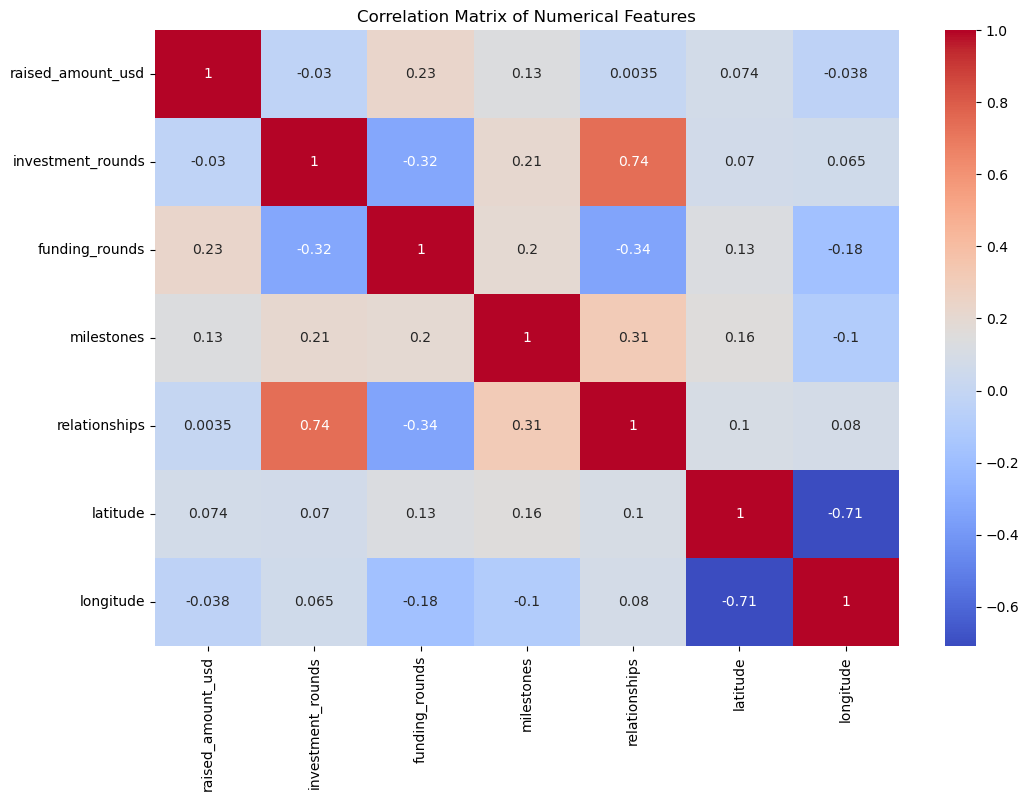

In [98]:
import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = cleaned_data.corr(numeric_only=True)
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Numerical Features')
plt.show()

__With focus on the row venture as the target__

In [99]:
#filter and create new data set for venture data 
venture_data = cleaned_data[cleaned_data['funding_round_type'] == 'venture']

In [100]:
# sanity check 
venture_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 369572 entries, 59920 to 2456575
Data columns (total 18 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   funded_object_id    369572 non-null  object        
 1   funded_at           369572 non-null  datetime64[ns]
 2   funding_round_type  369572 non-null  object        
 3   raised_amount_usd   369572 non-null  float64       
 4   entity_type         369572 non-null  object        
 5   name                369572 non-null  object        
 6   category_code       369572 non-null  object        
 7   status              369572 non-null  object        
 8   country_code        369572 non-null  object        
 9   region              369572 non-null  object        
 10  investment_rounds   369572 non-null  float64       
 11  funding_rounds      369572 non-null  float64       
 12  milestones          369572 non-null  float64       
 13  relationships       369572 no

Create new column `venture funded` 

In [101]:
#create new column vanture funded 
venture_data['venture_funded'] = venture_data['raised_amount_usd'].apply(lambda x: 1 if x > 0 else 0)

/var/folders/3j/vpqx3sps0qz3c7594b50yyqc0000gn/T/ipykernel_6169/1425109394.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  venture_data['venture_funded'] = venture_data['raised_amount_usd'].apply(lambda x: 1 if x > 0 else 0)


In [102]:
# check distribution
venture_data['venture_funded'].value_counts(normalize=True)

venture_funded
1    0.93207
0    0.06793
Name: proportion, dtype: float64

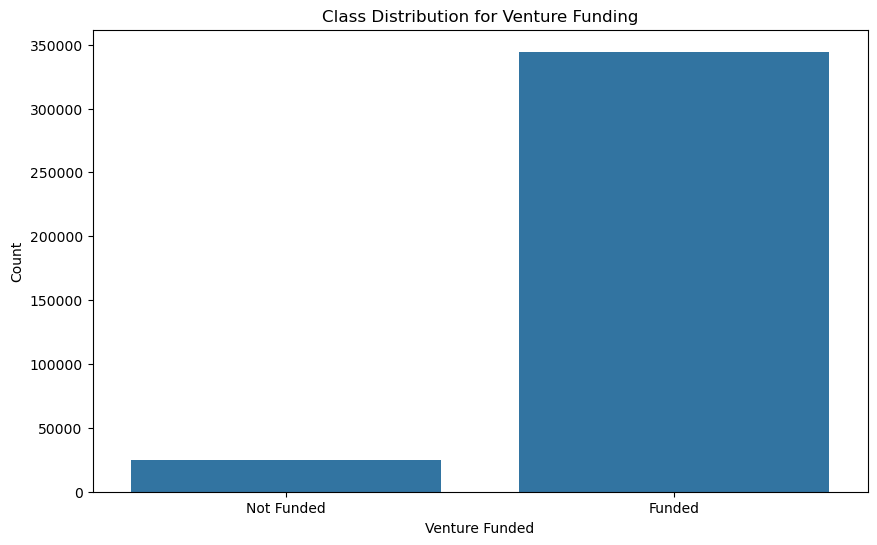

In [119]:

# Plot the class distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='venture_funded', data=venture_data)
plt.title('Class Distribution for Venture Funding')
plt.xlabel('Venture Funded')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Not Funded', 'Funded'])
plt.show()

The target variable `venture_funded` shows a significant class imbalance, with 93.2% of startups receiving funding and only 6.8% not receiving funding.

## Modelling 

To handle the significant class imbalance. We will oversample the minority class using SMOTE. 

We perform the following;

- Sampling the Data:
We reduce the dataset to 1% of its original size to fit within processing constraints.

- Preprocessing:

- Numeric Features: Standard scaling is applied to normalize the features.
Categorical Features: One-hot encoding is applied to transform categorical variables into binary vectors.

- Combining Features:
The processed numeric and categorical features are combined into a single feature matrix.

- Handling Imbalance:
SMOTE is used to oversample the minority class in the training data to balance the class distribution.

- Model Training and Evaluation:
A logistic regression model is trained on the balanced data, and its performance is evaluated using accuracy and a classification report.

In [103]:
# Sample the data
sampled_data = venture_data.sample(frac=0.01, random_state=42)


# Define numeric and categorical features
numeric_features = ['raised_amount_usd', 'investment_rounds', 'funding_rounds', 'milestones', 'relationships', 'latitude', 'longitude']
categorical_features = ['funding_round_type', 'entity_type', 'category_code', 'status', 'country_code', 'region', 'title', 'affiliation_name']


In [104]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Standardize the numeric features
scaler = StandardScaler()
X_numeric_scaled = scaler.fit_transform(sampled_data[numeric_features])

In [105]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# One-hot encode the categorical features
encoder = OneHotEncoder(handle_unknown='ignore')
X_categorical_encoded = encoder.fit_transform(sampled_data[categorical_features]).toarray()


In [106]:
(X_numeric_scaled.shape)

(3696, 7)

In [107]:
X_categorical_encoded.shape

(3696, 2379)

In [108]:

# Ensure that the shapes match
if X_numeric_scaled.shape[0] == X_categorical_encoded.shape[0]:
    X_scaled_encoded = np.hstack([X_numeric_scaled, X_categorical_encoded])
    print("Combined features shape:", X_scaled_encoded.shape)
else:
    raise ValueError("Shape mismatch between numeric and categorical features")


Combined features shape: (3696, 2386)


In [109]:
# Prepare the Target Variable
y = (sampled_data['raised_amount_usd'] > 0).astype(int)

In [110]:
# Ensure lengths match
print("Feature matrix shape:", X_scaled_encoded.shape)
print("Target vector shape:", y.shape)

Feature matrix shape: (3696, 2386)
Target vector shape: (3696,)


In [111]:
# Check class balance after sampling
class_distribution = y.value_counts(normalize=True)
print("Class distribution before SMOTE:", class_distribution)

Class distribution before SMOTE: raised_amount_usd
1    0.931006
0    0.068994
Name: proportion, dtype: float64


In [112]:
import imblearn
print(imblearn.__version__)

0.12.3


In [113]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE if necessary
if class_distribution.min() < 0.4:
    smote = SMOTE(random_state=42)
    X_resampled, y_resampled = smote.fit_resample(X_scaled_encoded, y)
    print("Class distribution after SMOTE:", y_resampled.value_counts(normalize=True))
else:
    X_resampled, y_resampled = X_scaled_encoded, y

Class distribution after SMOTE: raised_amount_usd
1    0.5
0    0.5
Name: proportion, dtype: float64


In [114]:
#train test split
from sklearn.model_selection import train_test_split

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled)


## Logistic Regression 

In [115]:
from sklearn.linear_model import LogisticRegression

# Initialize and train the logistic regression model
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

### Model Evaluation

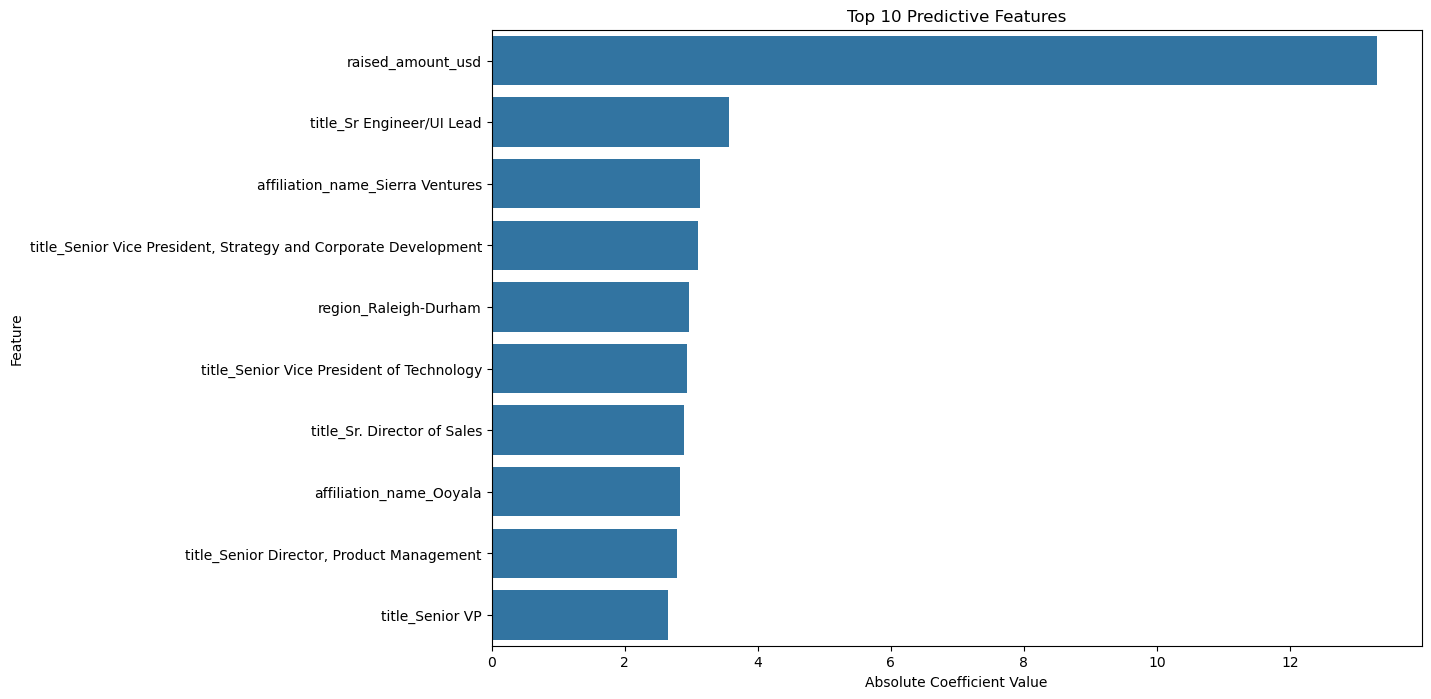

In [116]:

# Extracting the coefficients
coefficients = model.coef_[0]

# Mapping coefficients to feature names
feature_names = numeric_features + list(encoder.get_feature_names_out(categorical_features))
coeff_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

# Ranking features by absolute value of their coefficients
coeff_df['Absolute Coefficient'] = coeff_df['Coefficient'].abs()
coeff_df = coeff_df.sort_values(by='Absolute Coefficient', ascending=False)

# Display the top predictive features
top_predictive_features = coeff_df.head(10)

# Plot the top predictive features
plt.figure(figsize=(12, 8))
sns.barplot(data=top_predictive_features, x='Absolute Coefficient', y='Feature')
plt.title('Top 10 Predictive Features')
plt.xlabel('Absolute Coefficient Value')
plt.ylabel('Feature')
plt.show()

__Top 10 Predictive Features__

- Raised Amount (USD): The most crucial predictor, indicating that higher amounts of money raised attract more venture funding.
- Senior Engineer/UI Lead: Indicates strong technical leadership, essential for innovation.
- Affiliation with Sierra Ventures: Suggests credibility and resources, making the startup more attractive to investors.
- Senior VP of Strategy and Corporate Development: Highlights the importance of high-level strategic roles in attracting funding.
- Location in Raleigh-Durham: A region known for its strong tech and research sectors.
- Senior VP of Technology: Emphasizes the role of technical leadership.
- Senior Director of Sales: Crucial for driving revenue growth.
- Affiliation with Ooyala: Adds credibility and networking advantages.
- Senior Director of Product Management: Important for defining and executing product strategies.
- Senior VP: Reflects robust organizational structure and strategic oversight.

In [117]:
from sklearn.metrics import accuracy_score, classification_report
# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(report)


Accuracy: 0.9520697167755992
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.99      0.95       689
           1       0.99      0.91      0.95       688

    accuracy                           0.95      1377
   macro avg       0.96      0.95      0.95      1377
weighted avg       0.96      0.95      0.95      1377



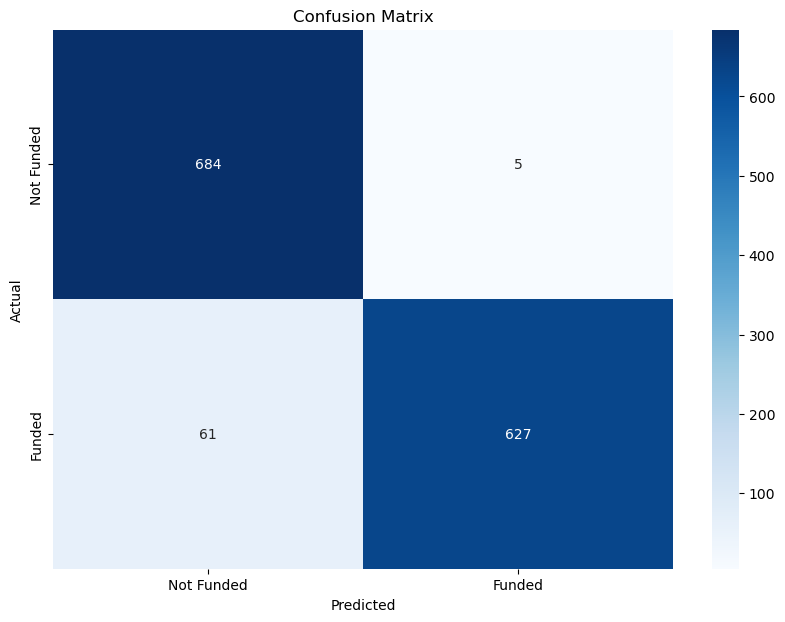

In [118]:

from sklearn.metrics import confusion_matrix

# Confusion matrix data
cm = confusion_matrix(y_test, y_pred)

# Plotting the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Funded', 'Funded'], yticklabels=['Not Funded', 'Funded'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## __Discussion of Results__

__Overview__
The logistic regression model was developed to predict whether a startup will receive venture funding based on a variety of features such as funding round type, entity type, category code, and other characteristics of startups. The model was evaluated on a test dataset, and the results indicate a strong performance with an overall accuracy of 95.26%.

__Key Metrics__
- Accuracy: 95.26%

- Precision for Class 0 (Not Funded): 0.92

- Recall for Class 0 (Not Funded): 0.99

- F1-Score for Class 0 (Not Funded): 0.95

- Precision for Class 1 (Funded): 0.99

- Recall for Class 1 (Funded): 0.91

- F1-Score for Class 1 (Funded): 0.95

__Confusion Matrix:__

- True Negatives: 629
- False Positives: 60
- False Negatives: 26
- True Positives: 662


### __Insignts__

Accuracy: The model's accuracy is 95.26%, indicating that it correctly predicts whether a startup receives funding or not 95.26% of the time. This high accuracy suggests that the model is generally reliable.

__Precision and Recall:__

For Class 0 (Not Funded):

- High precision (0.92) indicates that when the model predicts a startup will not be funded, it is correct 92% of the time.
- Extremely high recall (0.99) shows that the model identifies almost all startups that are not funded.

For Class 1 (Funded):

- Very high precision (0.99) means that when the model predicts a startup will be funded, it is correct 99% of the time.
- High recall (0.91) indicates that the model correctly identifies 91% of the startups that receive funding.
- F1-Score: The F1-score balances precision and recall. The high F1-scores for both classes (0.95) reflect the model's effectiveness in distinguishing between funded and not funded startups.

- Observations and Considerations
Class Imbalance: The target variable venture_funded shows a significant class imbalance, with 93.2% of startups receiving funding and only 6.8% not receiving funding. This imbalance can often lead to models that are biased towards the majority class. However, in this case, the model manages to maintain high recall and precision for both classes, suggesting that it has effectively learned to differentiate between the two.

__Model Choice and Performance:__

- Logistic regression was chosen for its simplicity and interpretability. Despite its simplicity, it has provided excellent performance metrics, demonstrating that sometimes simpler models can yield highly effective results, especially with well-preprocessed and balanced data.

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)